<a href="https://colab.research.google.com/github/johnreyes96/modeling-and-simulation/blob/master/src/main/python/classes/DataAnalysisNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis exploratorio Data Set Netflix

![](https://wallpapercave.com/wp/wp1917118.jpg)

**¿Qué es el análisis de datos exploratorios?**

El análisis exploratorio de datos (EDA para abreviar) es lo que hacen los analistas de datos con grandes conjuntos de datos, buscando patrones y resumiendo las características principales del conjunto de datos más allá de lo que aprenden del modelado y la prueba de hipótesis. EDA es una filosofía que permite a los analistas de datos acercarse a una base de datos sin suposiciones. Cuando un analista de datos emplea EDA, es como si le estuvieran pidiendo a los datos que les dijeran lo que no saben.

Es un enfoque para el análisis de datos, que utiliza estas técnicas:

1. Maximice los conocimientos sobre un conjunto de datos.
2. Descubra las estructuras subyacentes.
3. Extraer variables importantes.
4. Detectar valores atípicos y anomalías.
5. Pruebe los supuestos subyacentes.
6. Determinar la configuración óptima de los factores.


## **Proyecto**

1. **Descargue y cargue el conjunto de datos**
2. **Importar e instalar las bibliotecas requeridas**
3. **Preparación y limpieza de datos**
4. **Hacer y responder preguntas sobre los datos a través de la visualización**
5. **Resume y escribe una conclusión**

## Descargar el Data Set

#### Aqui se puede descargar :- https://www.kaggle.com/shivamb/netflix-shows

In [ ]:
!pip install plotly folium --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/modeling_and_simulation

/content/drive/MyDrive/modeling_and_simulation


### Cargar Librerias

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import folium

### Cargar Data Set

In [ ]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [ ]:
# Lets check first 5 data points to get some idea about the kind of the data we are dealing with
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Obtener más información sobre el tipo de datos de la columna número de valores faltantes del método data.info()


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Convertir date_added al formato de fecha
netflix_df["date_added"] = pd.to_datetime(netflix_df["date_added"])

In [ ]:
## Comprobación de valores nulos
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


**Podemos ver que faltan valores presentes en la columna director, elenco, país y muchos más
O podemos reemplazar los valores que faltan o podemos eliminar esas columnas
Aquí estoy reemplazando los valores faltantes para la columna de director y país**


In [ ]:
# Reemplazar valores faltantes
netflix_df["director"].fillna("missing", inplace=True)
netflix_df["country"].fillna("missisng", inplace=True)

In [ ]:
netflix_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country           0
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
netflix_df.dropna(inplace=True)

In [ ]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
## Cambiando el nombre de la columna list_in a Género
netflix_df.rename(columns={"listed_in":"genre"}, inplace=True)

In [ ]:
## Convertir múltiples géneros de películas en un solo género
netflix_df['genre'] = netflix_df['genre'].apply(lambda x: x.split(",")[0])

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missisng,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missisng,2021-09-24,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missisng,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
# Creando columna de año y mes
netflix_df["Year_added"] = netflix_df['date_added'].dt.year
netflix_df["Month_added"] = netflix_df['date_added'].dt.month

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7965 entries, 1 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7965 non-null   object        
 1   type          7965 non-null   object        
 2   title         7965 non-null   object        
 3   director      7965 non-null   object        
 4   cast          7965 non-null   object        
 5   country       7965 non-null   object        
 6   date_added    7965 non-null   datetime64[ns]
 7   release_year  7965 non-null   int64         
 8   rating        7965 non-null   object        
 9   duration      7965 non-null   object        
 10  genre         7965 non-null   object        
 11  description   7965 non-null   object        
 12  Year_added    7965 non-null   int64         
 13  Month_added   7965 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 933.4+ KB


In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,Year_added,Month_added
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missisng,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missisng,2021-09-24,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missisng,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9


In [ ]:
netflix_df.drop(axis=1, columns=["cast","date_added"], inplace=True)

In [ ]:
netflix_df.head(9)

,show_id,type,title,director,country,release_year,rating,duration,genre,description,Year_added,Month_added
1,s2,TV Show,Blood & Water,missing,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,missisng,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
4,s5,TV Show,Kota Factory,missing,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,missisng,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",missisng,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,9
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,missisng,2021,TV-MA,1 Season,Crime TV Shows,"Struggling to earn a living in Bangkok, a man ...",2021,9


In [ ]:
# Cálculo total de películas y programas de televisión en cada país

In [ ]:
country_number = {}

In [ ]:
def count_countries(one_row):
    country_list = one_row.split(",")

    for value in country_list:
        value = value.lower()
        if value in country_number.keys():
            count = country_number[value] + 1
            country_number[value] = count
        else:
            country_number[value] = 1

In [ ]:
netflix_df["country"].apply(count_countries)

1       None
2       None
4       None
5       None
6       None
        ... 
8801    None
8802    None
8804    None
8805    None
8806    None
Name: country, Length: 7965, dtype: object

In [ ]:
country_number.pop('missisng')

675

In [ ]:
country = []
number =[]
for key,val in country_number.items():
    country.append(key)
    number.append(val)

In [ ]:
country_n = {"country":country,
            "number":number}

In [ ]:
country_df = pd.DataFrame.from_dict(country_n)

In [ ]:
country_df

,country,number
0,south africa,39
1,india,976
2,united states,2839
3,ghana,1
4,burkina faso,1
...,...,...
180,sudan,1
181,panama,1
182,slovenia,2
183,east germany,1


In [ ]:
location = pd.read_csv("location_countries.csv");

In [ ]:
location = location.loc[:,["latitude","longitude","name"]]

In [ ]:
location["country"] = location["name"].str.lower()

In [ ]:
location

,latitude,longitude,name,country
0,42.546245,1.601554,Andorra,andorra
1,23.424076,53.847818,United Arab Emirates,united arab emirates
2,33.939110,67.709953,Afghanistan,afghanistan
3,17.060816,-61.796428,Antigua and Barbuda,antigua and barbuda
4,18.220554,-63.068615,Anguilla,anguilla
...,...,...,...,...
240,15.552727,48.516388,Yemen,yemen
241,-12.827500,45.166244,Mayotte,mayotte
242,-30.559482,22.937506,South Africa,south africa
243,-13.133897,27.849332,Zambia,zambia


In [ ]:
country_df_map =location.merge(country_df, on="country",how="inner")

In [ ]:
country_df_map

,latitude,longitude,name,country,number
0,23.424076,53.847818,United Arab Emirates,united arab emirates,20
1,-38.416097,-63.616672,Argentina,argentina,70
2,47.516231,14.550072,Austria,austria,7
3,-25.274398,133.775136,Australia,australia,100
4,23.684994,90.356331,Bangladesh,bangladesh,3
...,...,...,...,...,...
77,-32.522779,-55.765835,Uruguay,uruguay,7
78,6.423750,-66.589730,Venezuela,venezuela,1
79,14.058324,108.277199,Vietnam,vietnam,7
80,-30.559482,22.937506,South Africa,south africa,39


In [ ]:
# Países donde está presente netflix

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2)
tooltip = "Click me!"
for index, row in country_df_map.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row["number"],tooltip=tooltip).add_to(m)
    
m

In [ ]:
netflix_df.head()

,show_id,type,title,director,country,release_year,rating,duration,genre,description,Year_added,Month_added
1,s2,TV Show,Blood & Water,missing,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,missisng,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
4,s5,TV Show,Kota Factory,missing,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,missisng,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",missisng,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9


In [ ]:
# Encontrar el número de temporadas para programas de televisión

In [ ]:
def season_split(season):
    if "Seasons" in season:
        season_list.append(season.split(" ")[0])
    elif "Season" in season:
        season_list.append(season.split(" ")[0])
    else:
        season_list.append(0)

In [ ]:
season_list = []
netflix_df["duration"].apply(season_split)

1       None
2       None
4       None
5       None
6       None
        ... 
8801    None
8802    None
8804    None
8805    None
8806    None
Name: duration, Length: 7965, dtype: object

In [ ]:
netflix_df["seasons"] = season_list

In [ ]:
netflix_df.head()

,show_id,type,title,director,country,release_year,rating,duration,genre,description,Year_added,Month_added,seasons
1,s2,TV Show,Blood & Water,missing,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,missisng,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9,1
4,s5,TV Show,Kota Factory,missing,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,missisng,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",missisng,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,0


# Exploraracion de datos

In [ ]:
netflix_df.head()

,show_id,type,title,director,country,release_year,rating,duration,genre,description,Year_added,Month_added,seasons
1,s2,TV Show,Blood & Water,missing,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,missisng,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9,1
4,s5,TV Show,Kota Factory,missing,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,missisng,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",missisng,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,0


# 1. ¿Cuál es la proporción de películas y programas de televisión en Netflix?

In [ ]:
distribution = netflix_df["type"].value_counts()
fig = px.pie(values=distribution.values, names=["Movies","Tv Shows"])
fig.show()


**Información de la visualización:**
A partir de la visualización, podemos ver que el 71 % del contenido de Netflix son películas, por lo que Netflix tiene más películas en comparación con los programas de televisión en un 40 %.


In [ ]:
#2. Distribución de Rating en Netflix

In [ ]:
df_rating = pd.DataFrame(netflix_df["rating"].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})


fig = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',
color_discrete_sequence=['red'], text='count')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),
hovermode="y unified",
xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),
legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif")) 


**Información de la visualización:**
A partir de la visualización, podemos ver que la mayoría del contenido de Netflix es para audiencias maduras con un recuento de programas de 2879.

In [ ]:
# 3. Distribución de películas y programas de televisión en EE. UU., India, Canadá, Sudáfrica, Reino Unido, Japón

In [ ]:
list_of_countries = ["united states","india","japan","canada","south africa","united kingdom","japan"]
filt = country_df["country"].isin(list_of_countries)
df_country_list = country_df.loc[filt,]

fig = px.bar(df_country_list, x="number",y="country", orientation="h")
fig.show()

In [ ]:
df_country_list

,country,number
0,south africa,39
1,india,976
2,united states,2839
8,united kingdom,546
22,japan,251
36,canada,245



**Información de la visualización:**
De la visualización podemos ver que EE. UU. tiene la mayor cantidad de contenido sobre más de 2800 seguido de India cerca de 1000

In [ ]:
# 4. Año en que los programas o películas son agregados

In [ ]:

netflix_df["Year_added"].value_counts()
df_years = netflix_df.groupby(["Year_added"]).size().reset_index(name='counts')
fig = px.line(df_years,x="Year_added",y="counts", title="Content Added Over the Year")
fig.show()


**Información de la visualización:**
Desde la Visualización podemos ver que la cantidad de contenidos agregados aumentó durante el tiempo de pandemia, 2019 se agregaron alrededor de 1850 nuevos contenidos durante este año.

In [ ]:
# 5. Diferencia de crecimiento de películas y programas de televisión a lo largo de los años.

In [ ]:
d1 = netflix_df[netflix_df["type"] == "TV Show"]
d2 = netflix_df[netflix_df["type"] == "Movie"]

col = "Year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Difference of Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


**Información de la visualización:**
Desde la visualización podemos ver que hay mucha diferencia entre el nuevo contenido de programas de televisión y las películas del año 2017.

In [ ]:
# 6. Distribución entre el género

In [ ]:
df_genre = pd.DataFrame(netflix_df["genre"].value_counts()).reset_index().rename(columns={'index':'genre', 'genre':'count'})

df_genre["content"] = "All"

fig = px.treemap(df_genre, 
                      path=["content", 'count','genre'])

fig.update_layout(title='Highest watched Geners on Netflix',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                 plot_bgcolor='#333', paper_bgcolor='#333')
fig.show()


**Información de la visualización:**
De la Visualización podemos ver que Netflix tiene más cantidad de Crimen y género stand-up con el conteo de 333

In [ ]:
#7. Cuál es el mejor mes para lanzar el contenido

In [ ]:
fig = px.histogram(netflix_df, x="Month_added")
fig.update_layout(bargap=0.2,title="Movie Added over the Months")
fig.show()

**Información de la visualización:**
Desde la visualización podemos ver que casi todos los meses tienen una distribución equitativa de contenido, pero durante los meses de diciembre y julio se agregan más contenidos nuevos.

In [ ]:
# 8. Contar la cantidad de temporadas de programas de televisión

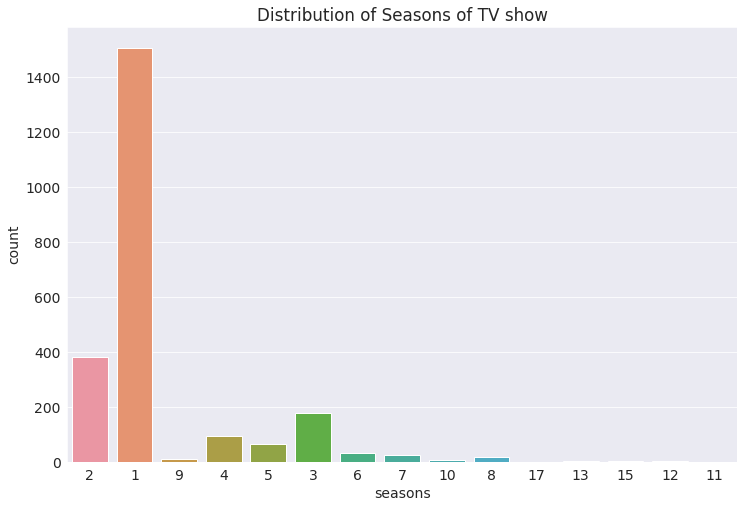

In [ ]:
import matplotlib

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

sns.set_style(style="darkgrid")

filt = netflix_df["seasons"] != 0

netflix_season = netflix_df.loc[filt]

sns.countplot(x="seasons", data=netflix_season)
plt.title("Distribution of Seasons of TV show");


**Información de la visualización:**
Desde la visualización podemos ver que alrededor de 1500 programas de televisión tienen solo una temporada y hay programas de televisión con más de 8 temporadas en los programas de televisión de Netflix.

In [ ]:
# 9. Los 15 mejores directores de películas y programas de televisión.

In [ ]:
netflix_df

,show_id,type,title,director,country,release_year,rating,duration,genre,description,Year_added,Month_added,seasons
1,s2,TV Show,Blood & Water,missing,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,missisng,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9,1
4,s5,TV Show,Kota Factory,missing,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,missisng,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",missisng,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,96 min,Dramas,Recovering alcoholic Talal wakes up inside a s...,2016,3,0
8802,s8803,Movie,Zodiac,David Fincher,United States,2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a...",2019,11,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,2019,11,0
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,1,0


In [ ]:
filt = netflix_df["type"]=="TV Show"
filt2 = netflix_df["type"] == "Movie"

df_movie_director = netflix_df.loc[filt,]
df_tv_director = netflix_df.loc[filt2,]

df_movie = pd.DataFrame(df_movie_director["director"].value_counts()).reset_index().rename(columns={'index':'director', 'director':'count'})
df_tv = pd.DataFrame(df_tv_director["director"].value_counts()).reset_index().rename(columns={'index':'director', 'director':'count'})

df_tv.drop(index=0,inplace=True)
df_movie.drop(index=0,inplace=True)

df_top_movie = df_movie.sort_values(by="count", ascending=False).head(15)
df_top_tv = df_tv.sort_values(by="count", ascending=False).head(15)

fig = px.bar(data_frame=df_top_movie,x="count",y="director")
fig.show()


**Información de la visualización:**
De la Visualización podemos ver que netflix tiene más películas dirigidas por Alastair Fothergill.

In [ ]:
fig = px.bar(data_frame=df_top_tv,x="count",y="director")
fig.show()


**Información de la visualización:**
De la visualización podemos ver que netflix tiene más programas de televisión dirigidos por Raúl Campos, Netflix tiene 18 programas dirigidos por él.

## Conclusión

1. Netflix se usa en la mayoría de los países, EE. UU. e India son los dos principales usuarios de Netflix.
2. Desde la época de Pandemia, Netflix agregó más contenido en comparación con otros años.
3. Netflix tiene más películas que programas de televisión
4. Netflix tiene programas de televisión con más de 8 temporadas.
